# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

In [13]:
# Importer resten av pakkene du trenger her:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [3]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Jeg tenker at hisogrammet viser en jevn fordeling av verdier, uten klare, separate klasser og vil derfor konkludere med at vi har et regresjonsproblem. Verdiene i y_train og y_test variere kontinuerlig over et bredt spekter, noe som er typisk for regresjon snarer enn klassifisering.

Typisk for et klassifiseringproblem ville vi vanligvis se et begrenset antall distinkte kategorier eller topper i dataene, mens en fordeling som dette ofte peker mot regresjon


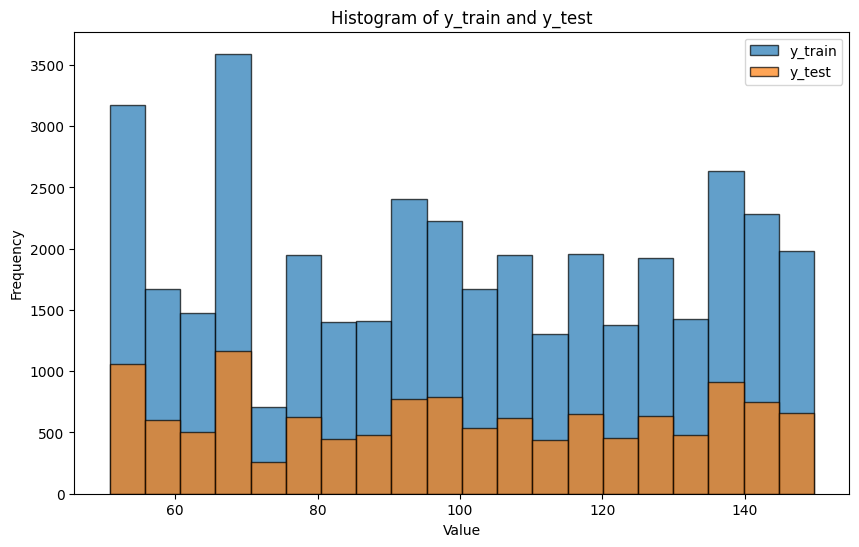

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=20, alpha=0.7, label='y_train', edgecolor='black')
plt.hist(y_test, bins=20, alpha=0.7, label='y_test', edgecolor='black')
plt.title("Histogram of y_train and y_test")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


**Svar:**

*< ditt tekstsvar her >*

#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

In [5]:
def korrelasjonsmatrise(X,y):
    X_temp = X.copy()
    y_temp = y.copy()
    X_temp["Target"] = y_temp
    #TODO: Fullfør koden
    correlation_matrix = X_temp.corr()
    
    # Visualiserer korrelasjonsmatrisen
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title("Korrelasjonsmatrise mellom egenskaper og target")
    plt.show()

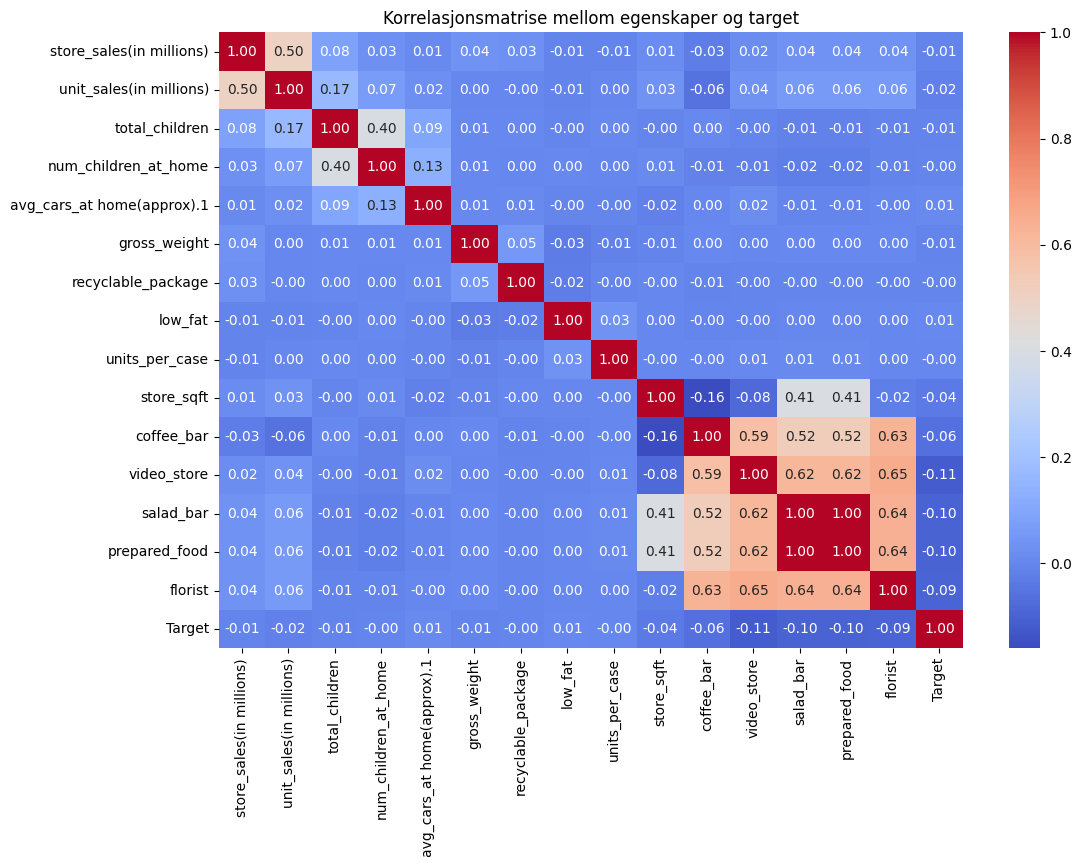

In [6]:
korrelasjonsmatrise(X_train,y_train)

**Svar:**

Basert på denne korrelasjonsmatrisen, ser vi at de fleste egenskapene har en lav korrelasjon med variablen Target. Dette indikerer svak eller ingen lineær sammenheng. Ingen av egenskapene/variabelene viser en sterk korrelasjon, (nær 1 eller -1). Dette kan f.eks bety at
Ingen enkel egenskap ahar linær betydning
Modellen kan kreve en kombinasjon av flere variabler eller komplekse sammenhenger, som ikke baserer seg på kun korrelasjonsmatrise.
Noen av variablene som video_store, salad_bar og prepared_food kan ha en viss innvirkning, selvom verdiene forsatt et lave.

#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [7]:
# Initialiserer modellen
model = RandomForestRegressor(random_state=0)

# Definerer parameterområdet for søket
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Konfigurerer RandomizedSearchCV med 3-folds kryssvalidering og ønsket metrikk
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,  # Antall tilfeldige kombinasjoner
    scoring='neg_mean_squared_error',
    cv=3,  # 3-folds kryssvalidering
    random_state=0,
    n_jobs=-1  # Bruker alle tilgjengelige prosessorer
)

# Tren søket på treningsdataene
random_search.fit(X_train, y_train)

# Henter de beste parameterkombinasjonene
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Beste parameterkombinasjon:", best_params)
print("Beste skår (neg_mean_squared_error):", best_score)
print("Beste skår (RMSE):", np.sqrt(-best_score))

Beste parameterkombinasjon: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 10}
Beste skår (neg_mean_squared_error): -851.0950357192729
Beste skår (RMSE): 29.17353313740509


**Svar:**
Hvis RMSE er liten i forhold til variasjonen eller gjennomsnitsverdien til target, indikerer det en god modell. Hvis RMSE er stor i forhold til target, betyr det at modellen slitem med å forutsi nøyaktig. I dette tilfellet har vi returnert en RMSE score på 29. Uten å vite target-verdiene er det vanskelig å kommentere funnet. Dersom target verdiene varierer mellom 0 og 100 vil 29 være 29% av skalaen som er moderat. Det vil også si at dersom target-verdiene varierer mellom 0 og 1000 er RMSE på 29 VELDIG lav, og indikerer høy nøyaktighet. MSE på -851 sier noe om den negative verdien av gjennomsnitlig kvadratisk feil. Modellen har en gjennomsnittlig kvadratisk feil på 851 enheter. 


#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [10]:

# Initialiser modellen med optimale hyperparametere
best_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=0
)

# Kryssvalidering med 5 folds
k_folds = 5
cv_scores_mae = cross_val_score(best_model, X_train, y_train, cv=k_folds, scoring='neg_mean_absolute_error')
cv_scores_mse = cross_val_score(best_model, X_train, y_train, cv=k_folds, scoring='neg_mean_squared_error')

# Gjør negativ skår positiv for enkel tolkning
cv_mae = -cv_scores_mae
cv_mse = -cv_scores_mse

# Logger MAE og MSE for hver fold
for i in range(k_folds):
    print(f"Fold {i+1}:")
    print(f"  Mean Absolute Error (MAE): {cv_mae[i]:.2f}")
    print(f"  Mean Squared Error (MSE): {cv_mse[i]:.2f}")

Fold 1:
  Mean Absolute Error (MAE): 25.19
  Mean Squared Error (MSE): 852.41
Fold 2:
  Mean Absolute Error (MAE): 25.20
  Mean Squared Error (MSE): 850.70
Fold 3:
  Mean Absolute Error (MAE): 25.26
  Mean Squared Error (MSE): 859.11
Fold 4:
  Mean Absolute Error (MAE): 24.95
  Mean Squared Error (MSE): 841.49
Fold 5:
  Mean Absolute Error (MAE): 24.79
  Mean Squared Error (MSE): 838.76


In [11]:
#TODO: Beregn gjennomsnitt og standard avvik for mean_absolute_error og mean_squared_error og beregn hvor stor den 
# gjennomsnittlige feilen er i forhold til den gjennomsnittlige prisen for markedskampanjen (target) i prosent
mean_mae = np.mean(cv_mae)
std_mae = np.std(cv_mae)
mean_mse = np.mean(cv_mse)
std_mse = np.std(cv_mse)

# Beregner prosentfeil i forhold til gjennomsnittlig target-verdi
mean_target_price = np.mean(y_train)
mean_error_percentage = (mean_mae / mean_target_price) * 100

# Oppsummerer resultatene
print("\nOppsummering:")
print(f"Gjennomsnittlig MAE: {mean_mae:.2f} ± {std_mae:.2f}")
print(f"Gjennomsnittlig MSE: {mean_mse:.2f} ± {std_mse:.2f}")
print(f"Gjennomsnittlig feil som prosentandel av gjennomsnittlig target: {mean_error_percentage:.2f}%")


Oppsummering:
Gjennomsnittlig MAE: 25.08 ± 0.18
Gjennomsnittlig MSE: 848.49 ± 7.44
Gjennomsnittlig feil som prosentandel av gjennomsnittlig target: 25.25%


**Svar:**

MAE 25.08 0.18, betyr at modellen i gjennomsnitt bommer med ca 25 enhet i prediksjonen. Standardavviket på 0.18 er svært lavt, noe som viser at modellen preseter stsbilt og jevnt på tvers av de 5 foldene.

MSE 848.49 7.44, viser gjennomsnitlig kvadratisk feil og roten av denne RMSE er rundt 29. MSE straffer større feil kraftigere som er grunnen til at den alltid er høyere. Det antyder også at modellen ikke har store feil i sine prediksjoner, side nMAE og RMSE er henholdsvis nærme. Standardavviket ligger på 7.44 som er litt høyere enn MAE, likevel er det lavt nok til å indikere stabilitet

Gjennomsnittlige prosentandel av target gir oss en forståelse av hvor signifikante prediksjonsfeilene er i forhold til de faktiske verdiene. Dette er en moderat feil, noe som kan være akseptabelt avhengig av konteksten. 

Modellen presterer stabilt over de 5 foldene, med konsistent MAE og MSE. 29% viser at modellen har en viss presisjon, men også at det er rom for feil i praktiske anvendelser. Generell god generaliseringsevne og ytelse av datasett.


#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [17]:
#TODO: Tren modellen på alle treningsdata og utfør prediksjon på testdataene
final_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=0
)

# Trener modellen på hele treningssettet
final_model.fit(X_train, y_train)

# Gjør prediksjoner på testsettet
y_test_pred = final_model.predict(X_test)

# Beregn gjennomsnittlig faktisk pris i testsettet
mean_actual_price_test = np.mean(y_test)

# Beregn gjennomsnittlig absolutt feil på testsettet
mean_absolute_error_test = mean_absolute_error(y_test, y_test_pred)

# Beregn prosentvis gjennomsnittlig feil i forhold til faktisk pris
error_percentage_test = (mean_absolute_error_test / mean_actual_price_test) * 100

mean_absolute_error_test, mean_actual_price_test, error_percentage_test



(np.float64(25.10228981992051),
 np.float64(99.30020325519818),
 np.float64(25.279192788164263))

**Svar:**

Gjennomsnitlig absolutt feil MAE 25.10
Gjennomsnittlig faktisk pris (target) i testsettet 99.30
Gjennomsnittlig feil som prosentandel av faktisk pris 25,28%
Svært likt resultat fra treningsdataene på 25,25% som tyder på at modellen ikke overtilpasser, og har en god generaliseringsevne